In [22]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

In [25]:
norm_control = {
    'train': np.load('../results/arrays/train_MSEs_norm_control3to30.npy'),
    'test': np.load('../results/arrays/test_MSEs_norm_control3to30.npy')
}

baseline = {
    'train': np.load('../results/arrays/train_MSEs_norm_control_baseline3to30_0.npy'),
    'test': np.load('../results/arrays/train_MSEs_norm_control_baseline3to30_0.npy'),
}

# baseline = {
#     'train': np.load('../results/arrays/train_MSEs_norm_control_baseline.npy'),
#     'test': np.load('../results/arrays/test_MSEs_norm_control_baseline.npy'),
# }

<IPython.core.display.Javascript object>


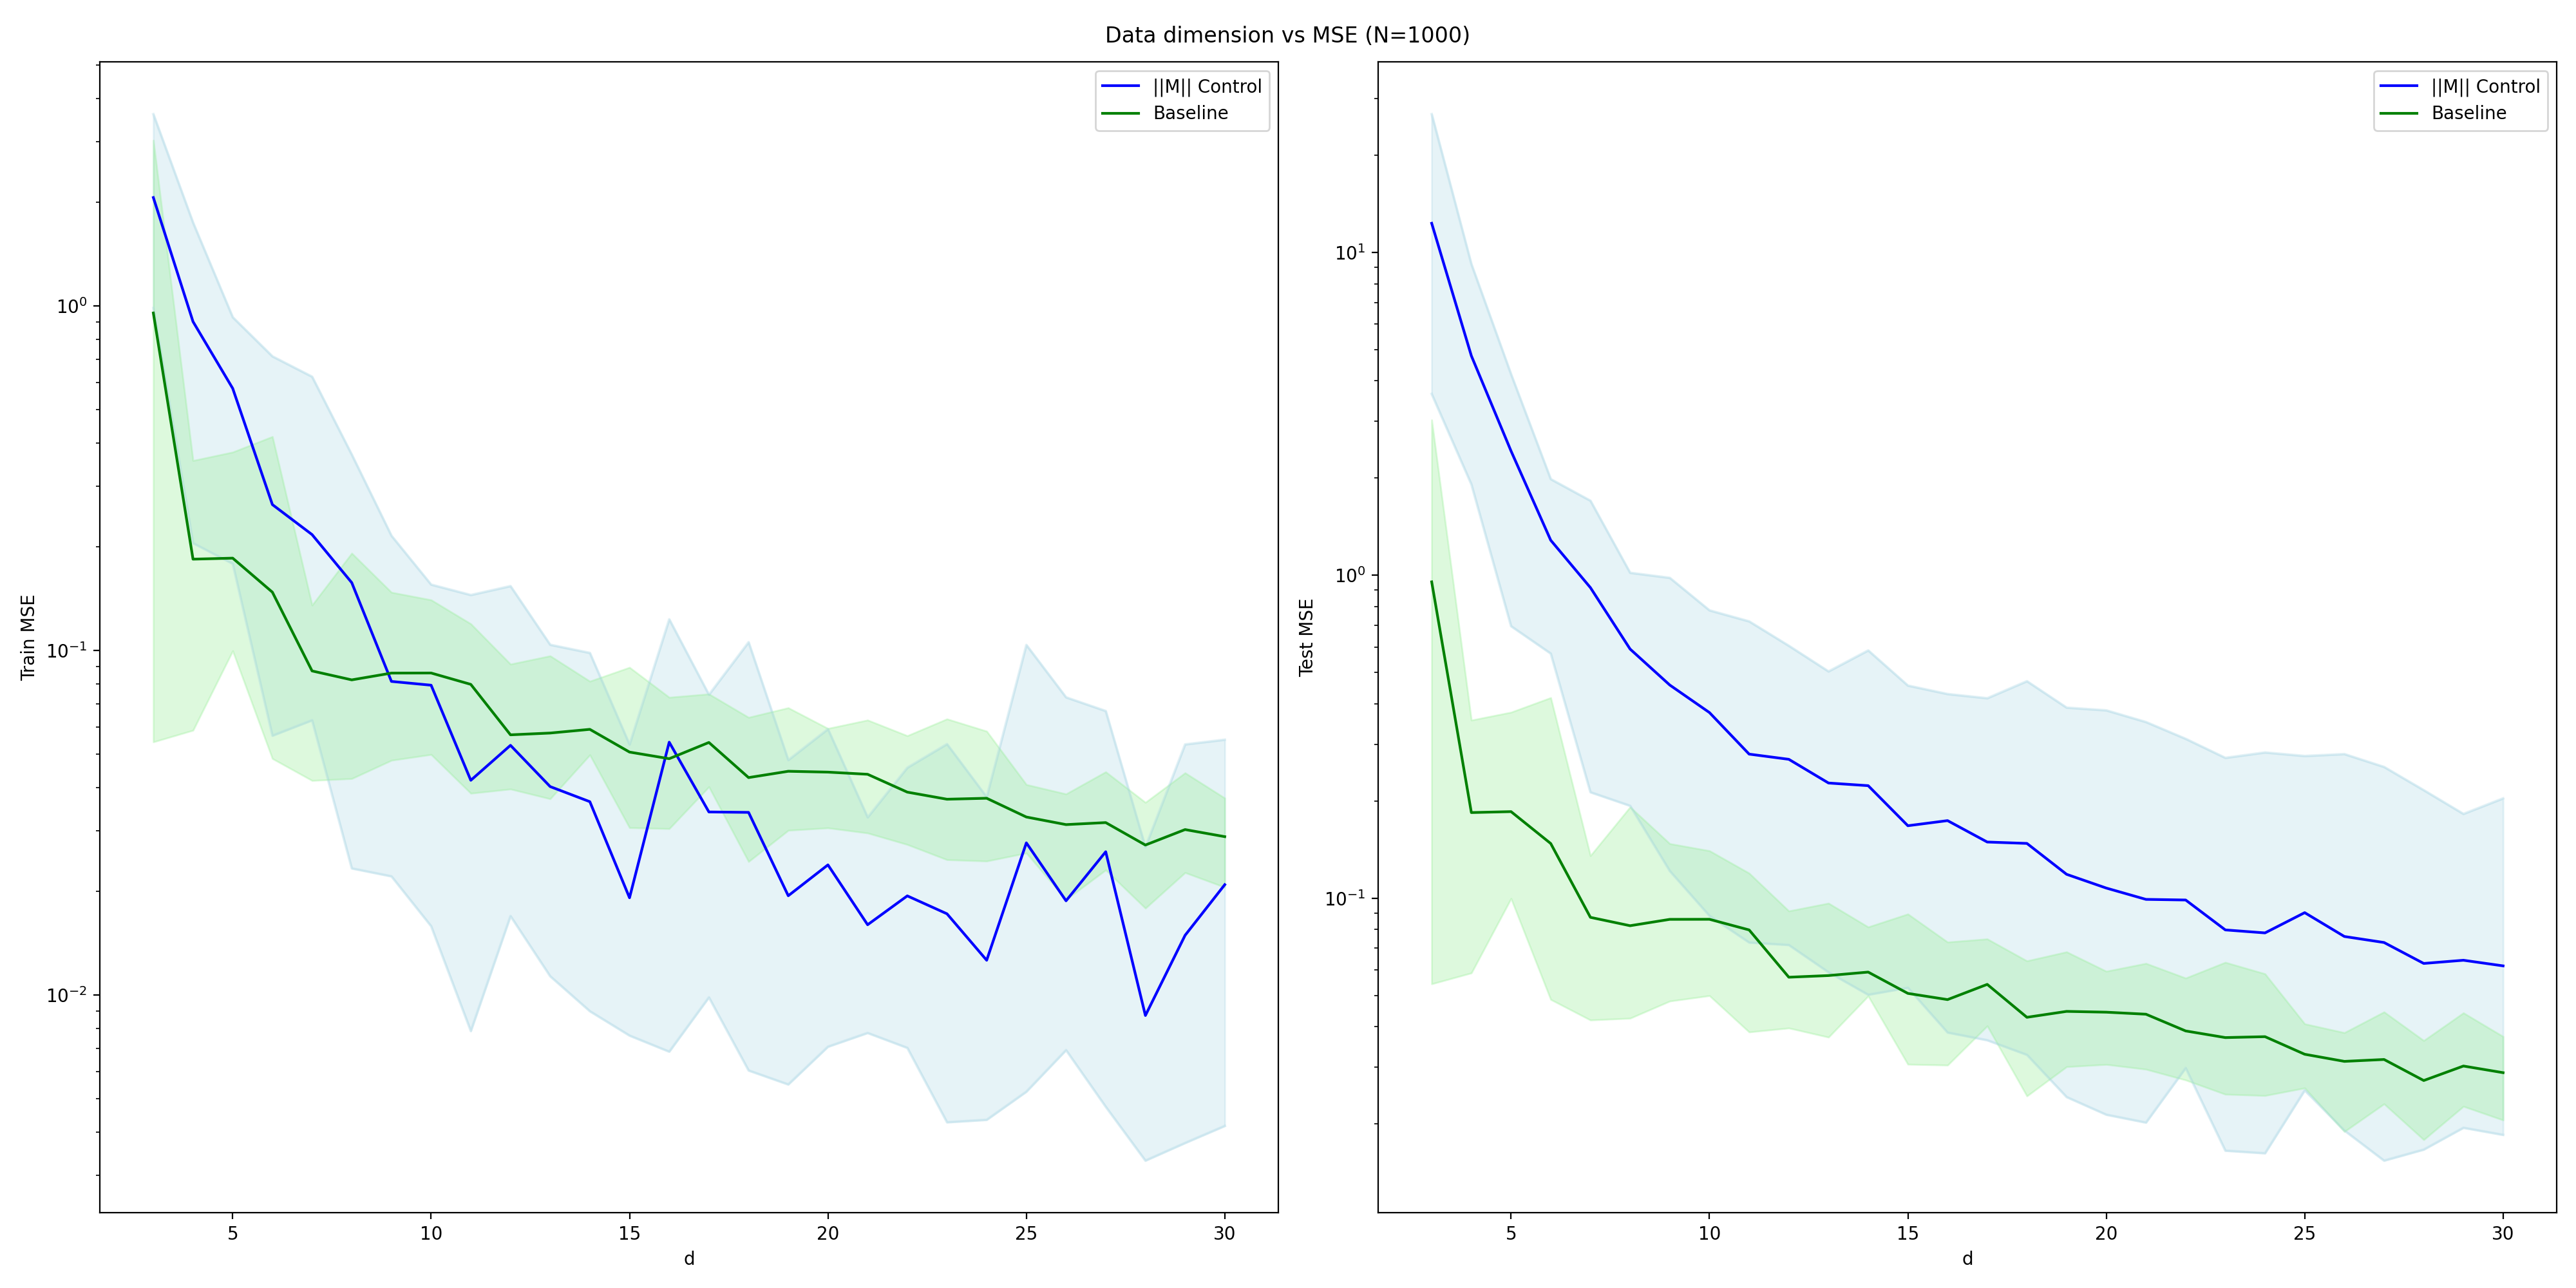

In [26]:
# plot the train and test MSEs
d_range = list(range(3, 31))

norm_control['train_mean'] = norm_control["train"].mean(axis=0)
norm_control['test_mean'] = norm_control["test"].mean(axis=0)
# no_norm['train_mean'] = no_norm["train"].mean(axis=0)
# no_norm['test_mean'] = no_norm["test"].mean(axis=0)
baseline['train_mean'] = baseline["train"].mean(axis=0)
baseline['test_mean'] = baseline["test"].mean(axis=0)

# get 2.5% and 97.5% quantiles
norm_control['train_025'] = np.quantile(norm_control["train"], 0.025, axis=0)
norm_control['train_975'] = np.quantile(norm_control["train"], 0.975, axis=0)
norm_control['test_025'] = np.quantile(norm_control["test"], 0.025, axis=0)
norm_control['test_975'] = np.quantile(norm_control["test"], 0.975, axis=0)
# no_norm['train_025'] = np.quantile(no_norm["train"], 0.025, axis=0)
# no_norm['train_975'] = np.quantile(no_norm["train"], 0.975, axis=0)
# no_norm['test_025'] = np.quantile(no_norm["test"], 0.025, axis=0)
# no_norm['test_975'] = np.quantile(no_norm["test"], 0.975, axis=0)
baseline['train_025'] = np.quantile(baseline["train"], 0.025, axis=0)
baseline['train_975'] = np.quantile(baseline["train"], 0.975, axis=0)
baseline['test_025'] = np.quantile(baseline["test"], 0.025, axis=0)
baseline['test_975'] = np.quantile(baseline["test"], 0.975, axis=0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle("Data dimension vs MSE (N=1000)")

ax1.plot(d_range, norm_control['train_mean'], color='blue', label="||M|| Control")
# ax1.plot(d_range, no_norm['train_mean'], color='red', label="No ||M|| Control")
ax1.plot(d_range, norm_control["train_025"], color='lightblue', alpha=0.3)
ax1.plot(d_range, norm_control["train_975"], color='lightblue', alpha=0.3)
# ax1.plot(d_range, no_norm["train_025"], color='pink', alpha=0.3)
# ax1.plot(d_range, no_norm["train_975"], color='pink', alpha=0.3)
ax1.plot(d_range, baseline['train_mean'], color='green', label="Baseline")
ax1.fill_between(d_range, norm_control['train_025'], norm_control['train_975'], color='lightblue', alpha=0.3)
# ax1.fill_between(d_range, no_norm['train_025'], no_norm['train_975'], color='pink', alpha=0.3)
ax1.fill_between(d_range, baseline['train_025'], baseline['train_975'], color='lightgreen', alpha=0.3)
ax1.set_xlabel("d")
ax1.set_ylabel("Train MSE")
ax1.set_yscale("log")
ax1.legend()

ax2.plot(d_range, norm_control['test_mean'], label="||M|| Control", color='blue')
# ax2.plot(d_range, no_norm['test_mean'], label="No ||M|| Control", color='red')
ax2.plot(d_range, norm_control["test_025"], color='lightblue', alpha=0.3)
ax2.plot(d_range, norm_control["test_975"], color='lightblue', alpha=0.3)
# ax2.plot(d_range, no_norm["test_025"], color='pink', alpha=0.3)
# ax2.plot(d_range, no_norm["test_975"], color='pink', alpha=0.3)
ax2.plot(d_range, baseline['test_mean'], color='green', label="Baseline")
ax2.fill_between(d_range, norm_control['test_025'], norm_control['test_975'], color='lightblue', alpha=0.3)
# ax2.fill_between(d_range, no_norm['test_025'], no_norm['test_975'], color='pink', alpha=0.3)
ax2.fill_between(d_range, baseline['test_025'], baseline['test_975'], color='lightgreen', alpha=0.3)
ax2.set_xlabel("d")
ax2.set_ylabel("Test MSE")
ax2.set_yscale("log")
ax2.legend()

plt.tight_layout()
# plt.savefig("../results/plots/scaling_plot.png", dpi=300)

KeyError: 'test_mean'

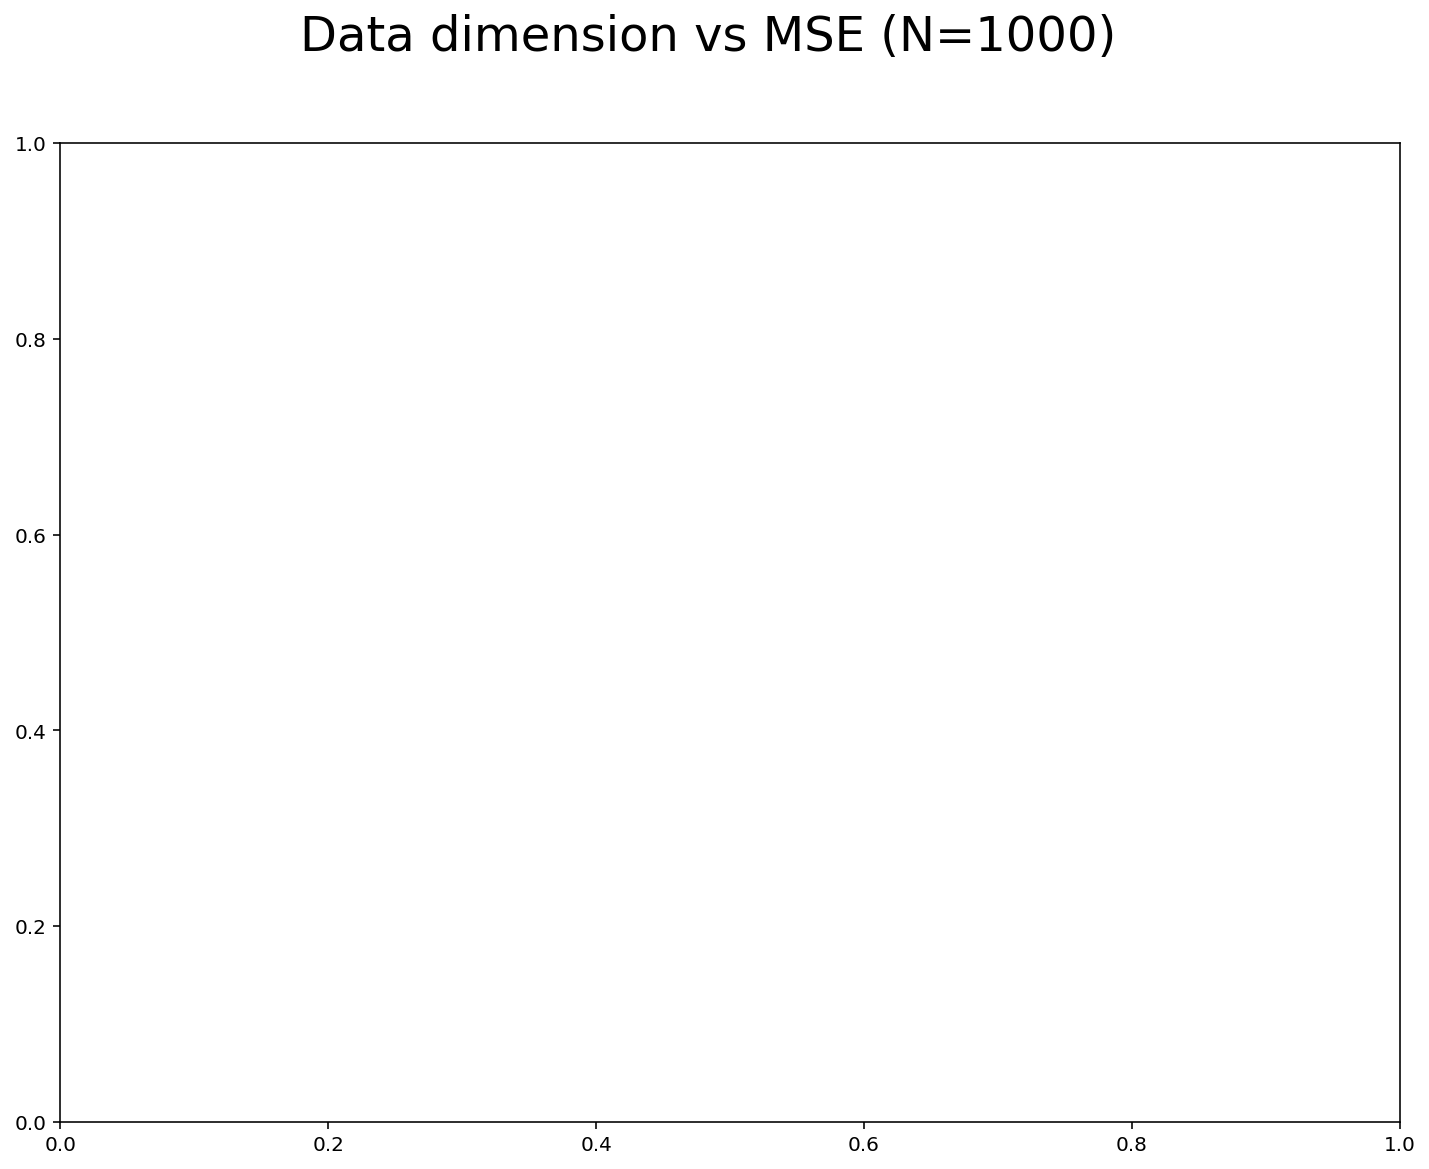

In [8]:
# plot just the test on its own plot
d_range = list(range(10, 2001, 10))
fig, ax = plt.subplots(figsize=(12, 9))
fig.suptitle("Data dimension vs MSE (N=1000)", fontsize=24)

ax.plot(d_range, norm_control['test_mean'], label="RFM", color='blue')
# ax.plot(d_range, no_norm['test_mean'], label="No ||M|| Control", color='red')
ax.plot(d_range, norm_control["test_025"], color='lightblue', alpha=0.3)
ax.plot(d_range, norm_control["test_975"], color='lightblue', alpha=0.3)
# ax.plot(d_range, no_norm["test_025"], color='pink', alpha=0.3)
# ax.plot(d_range, no_norm["test_975"], color='pink', alpha=0.3)
# ax.plot(d_range, baseline['test_mean'], color='green', label="Baseline")
ax.fill_between(d_range, norm_control['test_025'], norm_control['test_975'], color='lightblue', alpha=0.3, label="95% CI")
# ax.fill_between(d_range, no_norm['test_025'], no_norm['test_975'], color='pink', alpha=0.3)
# ax.fill_between(d_range, baseline['test_025'], baseline['test_975'], color='lightgreen', alpha=0.3)
ax.set_xlabel("d")
ax.set_ylabel("Test MSE")
ax.set_yscale("log")
ax.legend()

# change font size of axis labels to 20
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
# change font size of tick labels to 16
ax.tick_params(axis='both', which='major', labelsize=16)
# change font size of legend to 16
ax.legend(fontsize=16)

plt.tight_layout()
# plt.savefig("../results/plots/scaling_plot_test.png", dpi=300)